In [1]:
#Gerardo Salazar Vargas
#Josafat Arguedas Gutiérrez
#Francisco Arias Sanabria
#Angie Soza Hidalgo

import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

datos = pd.read_csv("/content/coffee_analysis.csv")

print(datos)

                            name                    roaster         roast  \
0        “Sweety” Espresso Blend                     A.R.C.  Medium-Light   
1           Flora Blend Espresso                     A.R.C.  Medium-Light   
2       Ethiopia Shakiso Mormora               Revel Coffee  Medium-Light   
3             Ethiopia Suke Quto                Roast House  Medium-Light   
4     Ethiopia Gedeb Halo Beriti  Big Creek Coffee Roasters        Medium   
...                          ...                        ...           ...   
2090              Finca Patzibir               El Gran Cafe  Medium-Light   
2091             Proyecto Aurora               El Gran Cafe  Medium-Light   
2092            Finca El Potrero               El Gran Cafe  Medium-Light   
2093    Chacayá Santiago Atitlán               El Gran Cafe  Medium-Light   
2094              Espresso No. 3               El Gran Cafe  Medium-Light   

        loc_country                     origin_1           origin_2  100g_U

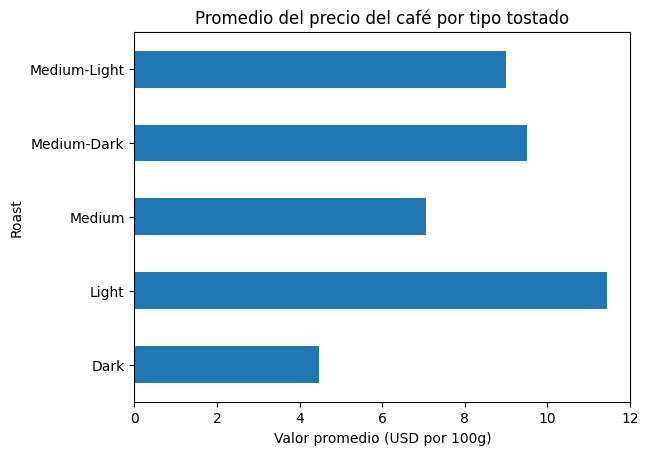

In [2]:

def grafico_promedio_precio(df):
    valor_por_tostado = df.groupby("roast")["100g_USD"].mean()
    valor_por_tostado.head(10).plot.barh()
    plt.title('Promedio del precio del café por tipo tostado')
    plt.ylabel('Roast')
    plt.xlabel('Valor promedio (USD por 100g)')
    plt.show()


grafico_promedio_precio(datos)

In [3]:

def promedio_cafe(df):
    tostados = ['Medium-Light', 'Medium-Dark', 'Medium', 'Light', 'Dark']
    promedios = {}

    total_cafes = len(df)  # Total de cafés en el DataFrame

    for tostado in tostados:
        df_tostado = df[df['roast'] == tostado]
        if not df_tostado.empty:
            promedio = df_tostado['rating'].mean()
            promedios[tostado] = round(promedio, 2)  # Redondear a 2 decimales
        else:
            promedios[tostado] = 0  # Si no hay cafés con este tostado, el promedio es cero

    # Calcular la suma de los promedios
    suma_promedios = sum(promedios.values())

    # Ajustar los promedios para que sumen 100%
    for tostado in tostados:
        if promedios[tostado] != 0:
            promedios[tostado] = round((promedios[tostado] / suma_promedios) * 100, 2)

    return promedios, total_cafes

promedios, total_cafes = promedio_cafe(datos)
print(promedios)
print("Total de cafés:", total_cafes)


{'Medium-Light': 20.31, 'Medium-Dark': 20.01, 'Medium': 20.1, 'Light': 20.37, 'Dark': 19.21}
Total de cafés: 2095


In [4]:

def cafe_origenes(datos):
    # Crear una nueva columna llamada "Origen" que combine los valores de origin_1 y origin_2
    datos["Origen"] = datos["origin_1"].fillna('') + datos["origin_2"].fillna('')

    # Contar la cantidad de registros que tienen "Costa Rica" en la columna "Origen"
    costa_rica_count = (datos["Origen"].str.contains("Costa Rica")).sum()

    # Contar la cantidad de registros que tienen "Colombia" en la columna "Origen"
    colombia_count = (datos["Origen"].str.contains("Colombia")).sum()

    # Imprimir los resultados
    print("Marcas de Café provenientes de Costa Rica:", costa_rica_count)
    print("Marcas de Café provenientes de Colombia:", colombia_count)

cafe_origenes(datos)


Marcas de Café provenientes de Costa Rica: 85
Marcas de Café provenientes de Colombia: 199


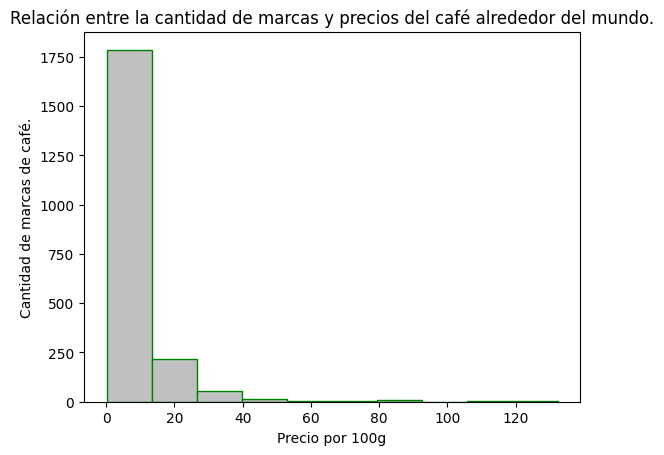

In [5]:

def grafico_histograma(df):
    df = datos[["100g_USD","loc_country"]]
    df = datos.rename(columns={
        "100g_USD":"PRECIO_POR_100G",
        "loc_country":"PAIS"
    })
    df.PRECIO_POR_100G.plot.hist(color = "silver", ec="green")
    plt.title("Relación entre la cantidad de marcas y precios del café alrededor del mundo.")
    plt.xlabel("Precio por 100g")
    plt.ylabel("Cantidad de marcas de café.")
    plt.show()

grafico_histograma(datos)

In [6]:

#Filtrar los datos por origen
def calcular_media_rating(df, origen1, origen2):
    # Filtrar los datos por origen
    data_origen1 = df[df['origin_1'] == origen1]
    data_origen2 = df[df['origin_1'] == origen2]

    # Calcular la media de los valores
    median_rating_origen1 = data_origen1['rating'].median()
    median_rating_origen2 = data_origen2['rating'].median()

    # Imprimir el resultado
    print("Media de rating para café de " + origen1 + ":", median_rating_origen1)
    print("Media de rating para café de " + origen2 + ":", median_rating_origen2)

calcular_media_rating(datos, 'Costa Rica', 'Colombia')

Media de rating para café de Costa Rica: 93.0
Media de rating para café de Colombia: 92.0


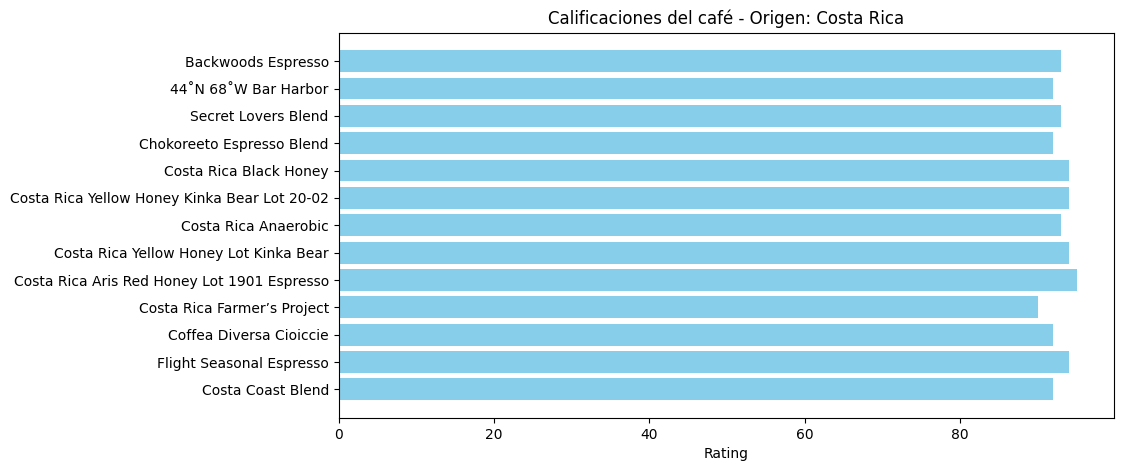

In [7]:
def grafica_ratings(df, origen):
    # Filtrar los datos por origen
    data_origen = df[df['origin_1'] == origen]

    # Extraer las columnas "rating" y "name" de los datos filtrados
    ratings = data_origen['rating']
    names = data_origen['name']

    # Crear un DataFrame con los nombres del café y las calificaciones
    dtf = pd.DataFrame({'Coffee Name': names, 'Rating': ratings})

    # Crear un gráfico de barras
    plt.figure(figsize=(10,5))
    plt.barh(dtf['Coffee Name'], dtf['Rating'], color='skyblue')
    plt.xlabel('Rating')
    plt.title(f'Calificaciones del café - Origen: {origen}')
    plt.show()

grafica_ratings(datos, 'Costa Rica')


In [8]:

def promedio_precioCafe_CR():
  costa_rica_data = datos[datos['origin_1'] == 'Costa Rica']
  median_price_CR = costa_rica_data['100g_USD'].median()
  print("Media de precio para café de Costa Rica:", median_price_CR)

promedio_precioCafe_CR()

Media de precio para café de Costa Rica: 4.885


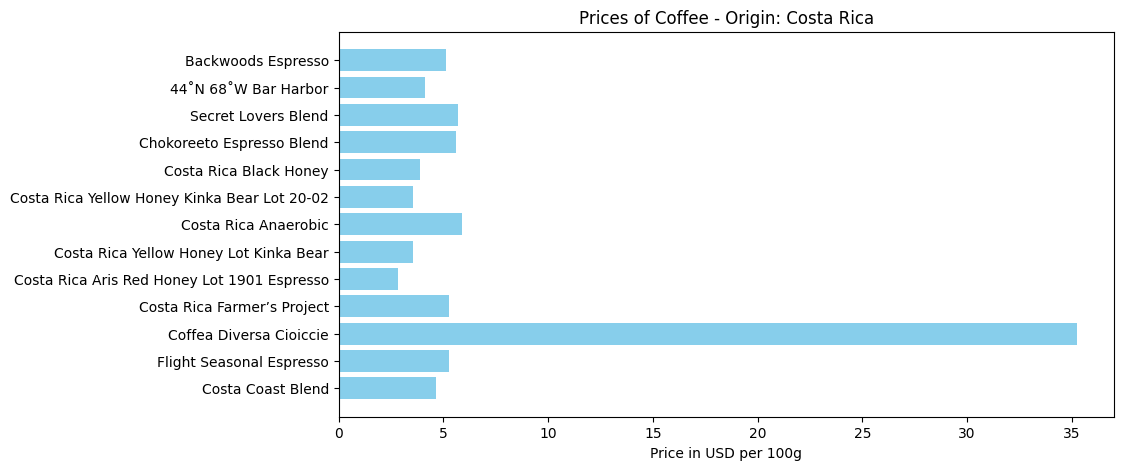

In [9]:


def grafica_precios_Guatemala():
  guatemala_data = datos[datos['origin_1'] == 'Costa Rica']
  prices = guatemala_data['100g_USD']
  names = guatemala_data['name']

  # Crear un DataFrame con los nombres del café y los precios
  dtf = pd.DataFrame({'Coffee Name': names, 'Price in USD per 100g': prices})

  # Crear un gráfico de barras
  plt.figure(figsize=(10,5))
  plt.barh(dtf['Coffee Name'], dtf['Price in USD per 100g'], color='skyblue')
  plt.xlabel('Price in USD per 100g')
  plt.title(f'Prices of Coffee - Origin: Costa Rica')
  plt.show()

grafica_precios_Guatemala()


In [10]:

def promedio_precio_por_paisDeLocalizacion():
  valor_por_pais = datos.groupby("loc_country")["100g_USD"].mean()

  # Redondear el valor promedio a 2 dígitos después de la coma
  valor_por_pais = valor_por_pais.round(2)

  # Crear un DataFrame con los valores promedio
  data_dict = {'País de localización': valor_por_pais.index, 'Valor promedio (USD por 100g)': valor_por_pais.values}
  df = pd.DataFrame(data_dict)

  # Utilizar tabulate para imprimir la tabla de manera bonita
  table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
  return table

tabla_promedio_precios = promedio_precio_por_paisDeLocalizacion()
print(tabla_promedio_precios)

+-------------------------+-------------------------------+
|  País de localización   | Valor promedio (USD por 100g) |
+-------------------------+-------------------------------+
|        Australia        |             42.78             |
|         Belgium         |             3.02              |
|         Canada          |              5.5              |
|          China          |             26.22             |
|         England         |             92.18             |
|        Guatemala        |             3.62              |
|         Hawai'i         |             17.55             |
|        Honduras         |             11.46             |
|        Hong Kong        |             13.32             |
|          Japan          |             13.24             |
|          Kenya          |             6.91              |
|        Malaysia         |             8.11              |
|         Mexico          |             10.58             |
|       New Taiwan        |             

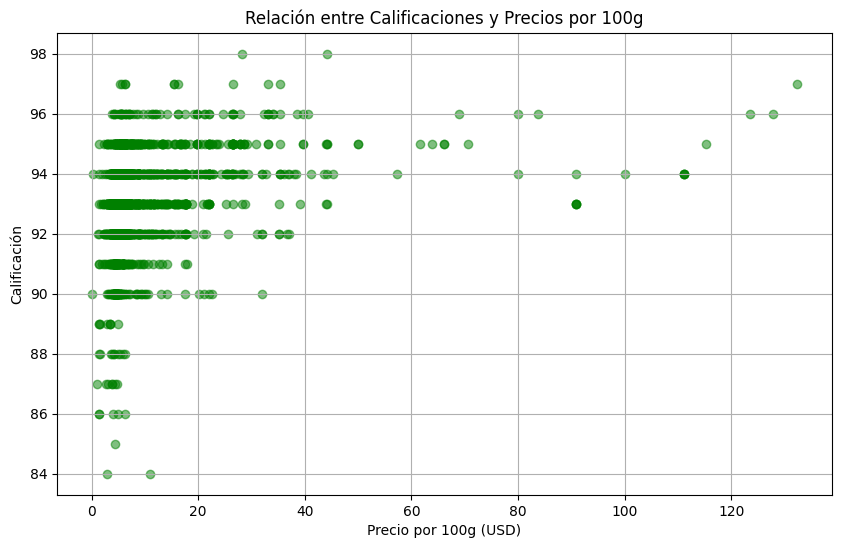

In [11]:

def scatter_plot_ratings_vs_prices(data):
    filtered_data = data.dropna(subset=['rating', '100g_USD'])
    ratings = filtered_data['rating']
    prices = filtered_data['100g_USD']

    plt.figure(figsize=(10, 6))
    plt.scatter(prices, ratings, alpha=0.5, color='green')
    plt.title('Relación entre Calificaciones y Precios por 100g')
    plt.xlabel('Precio por 100g (USD)')
    plt.ylabel('Calificación')
    plt.grid(True)
    plt.show()

scatter_plot_ratings_vs_prices(datos)


In [12]:
def tabla_ratings(df, origen):
    # Filtrar los datos por origen
    data_origen = df[df['origin_1'] == origen]

    # Extraer las columnas "rating" y "name" de los datos filtrados
    ratings = data_origen['rating']
    names = data_origen['name']

    # Crear un DataFrame con los nombres del café y las calificaciones
    dtf = pd.DataFrame({'Coffee Name': names, 'Rating': ratings})

    # Imprimir un título
    print("Tabla de Calificaciones")
    print(f"Origen: {origen}\n")

    # Imprimir la tabla usando tabulate para un formato más bonito
    print(tabulate(dtf, headers='keys', tablefmt='psql', showindex=False))


tabla_ratings(datos, 'Costa Rica')

Tabla de Calificaciones
Origen: Costa Rica

+----------------------------------------------+----------+
| Coffee Name                                  |   Rating |
|----------------------------------------------+----------|
| Costa Coast Blend                            |       92 |
| Flight Seasonal Espresso                     |       94 |
| Coffea Diversa Cioiccie                      |       92 |
| Costa Rica Farmer’s Project                  |       90 |
| Costa Rica Aris Red Honey Lot 1901 Espresso  |       95 |
| Costa Rica Yellow Honey Lot Kinka Bear       |       94 |
| Costa Rica Anaerobic                         |       93 |
| Costa Rica Yellow Honey Kinka Bear Lot 20-02 |       94 |
| Costa Rica Black Honey                       |       94 |
| Costa Rica Black Honey                       |       94 |
| Chokoreeto Espresso Blend                    |       92 |
| Secret Lovers Blend                          |       93 |
| 44˚N 68˚W Bar Harbor                         |       9

In [14]:
def precios_Guatemala():
  guatemala_data = datos[datos['origin_1'] == 'Guatemala']
  prices = guatemala_data['100g_USD']
  names = guatemala_data['name']

  # Crear un DataFrame con los datos
  data_dict = {'Nombre': names, 'Precio en dólares por 100g': prices}
  df = pd.DataFrame(data_dict)

  # Utilizar tabulate para imprimir la tabla de manera bonita
  table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
  return table

tabla_precios_guatemala = precios_Guatemala()
print("Tabla de Precio en dolares")
print(f"Origen: Guatemala \n")
print(tabla_precios_guatemala)

Tabla de Precio en dolares
Origen: Guatemala 

+--------------------------------------+----------------------------+
|                Nombre                | Precio en dólares por 100g |
+--------------------------------------+----------------------------+
|            Dead Reckoning            |            5.0             |
|     Summer Night Blend Espresso      |            3.54            |
|              Cold Brew               |            0.12            |
|         Espresso 1849 Blend          |            5.29            |
|             Cupid Blend              |            7.2             |
|         No. 6 Espresso Blend         |            3.47            |
| Coffea Diversa Bourbon Rey Guatemala |           17.61            |
|     La Finca Medina of Guatemala     |            5.29            |
|      Guatemala (from bulk bin)       |            1.54            |
|           100% Guatemalan            |            0.99            |
|            Session Blend             |   

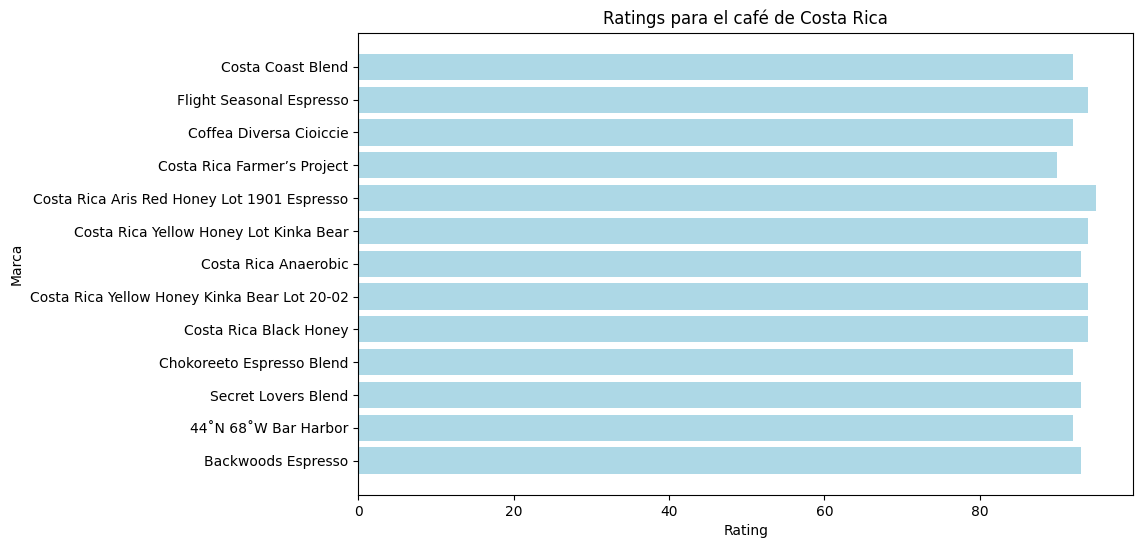

In [15]:
costa_rica_data = datos[datos['origin_1'] == 'Costa Rica']

# Step 4: Extract the "rating" and "name" columns from the filtered data
ratings = costa_rica_data['rating']
names = costa_rica_data['name']

# Step 5: Create a horizontal bar chart to display ratings with coffee names on the y-axis
plt.figure(figsize=(10, 6))
plt.barh(names, ratings, color='lightblue')
plt.xlabel('Rating')
plt.ylabel('Marca')
plt.title('Ratings para el café de Costa Rica')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rating at the top
plt.show()